In [3]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('Scorecard.txt', sep='\t')
df.columns

Index(['UNITID', 'OPEID', 'NAME', 'CITY', 'STATE', 'ZIP', 'MAINCAMPUS',
       'HIGHESTDEG', 'TYPE', 'LOCALE', 'LOCALE 2', 'LATITUDE', 'LONGITUDE',
       'CARNEGIE', 'CARNEGIE.ABBREV', 'UGPROFILE', 'UGPROFILE.ABBREV',
       'SIZE.SETTING', 'TWO.YR.FOUR.YR', 'HIST.BLACK', 'PRED.BLACK',
       'ALASKA.HAWAII', 'TRIBAL', 'AANAPII', 'HISPANIC', 'NATIVE.AM',
       'MENONLY', 'WOMENONLY', 'UGDS', 'EXP.PER.STD', 'TUITFTE',
       'LOG(TUITION)', 'MEDIAN.DEBT', 'PCTPELL', 'AVE.AGE', 'FEMALE.PCT',
       'FIRST_GEN', 'FAMILY.INC', 'MED.INC.AFT6'],
      dtype='object')

<AxesSubplot:xlabel='TYPE', ylabel='UGDS'>

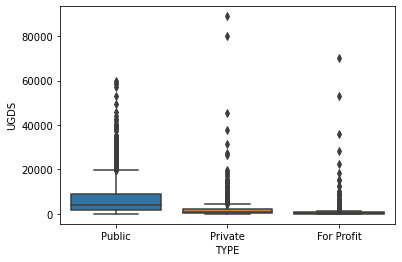

In [4]:
sns.boxplot(data=df, x='TYPE', y='UGDS')

In [5]:
df.TYPE.unique()

array(['Public', 'Private', 'For Profit'], dtype=object)

In [6]:
df_public = df[df.TYPE == 'Public']
df_private = df[df.TYPE == 'Private']
df_fp = df[df.TYPE == 'For Profit']


count     1614.000000
mean      6994.280050
std       8165.446986
min         28.000000
25%       1656.750000
50%       3969.000000
75%       8892.500000
max      59821.000000
Name: UGDS, dtype: float64

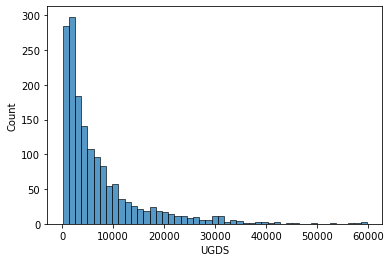

In [11]:
sns.histplot(df_public.UGDS)
df_public.UGDS.describe()

count     1450.000000
mean      1911.693103
std       4260.689228
min          0.000000
25%        324.000000
50%       1023.500000
75%       2034.250000
max      88921.000000
Name: UGDS, dtype: float64

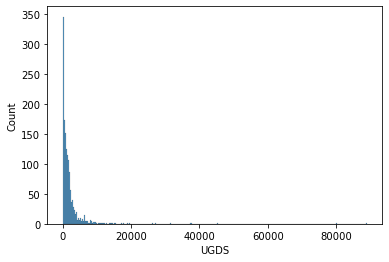

In [12]:
sns.histplot(df_private.UGDS)
df_private.UGDS.describe()

count      612.000000
mean      1184.116013
std       4417.546640
min          0.000000
25%        167.750000
50%        376.000000
75%        707.250000
max      70241.000000
Name: UGDS, dtype: float64

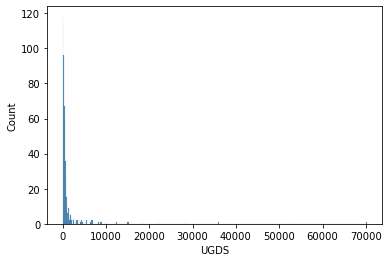

In [13]:
sns.histplot(df_fp.UGDS)
df_fp.UGDS.describe()

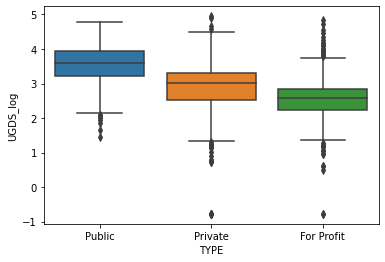

count    1614.000000
mean        3.576473
std         0.520347
min         1.449735
25%         3.219301
50%         3.598699
75%         3.949031
max         4.776855
Name: UGDS_log, dtype: float64


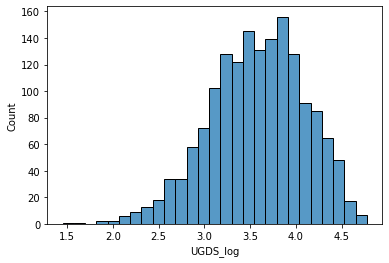

count    1450.000000
mean        2.892018
std         0.664493
min        -0.778151
25%         2.510768
50%         3.010158
75%         3.308440
max         4.949005
Name: UGDS_log, dtype: float64


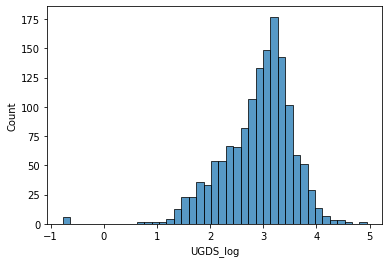

count    612.000000
mean       2.555954
std        0.613774
min       -0.778151
25%        2.225092
50%        2.575380
75%        2.849675
max        4.846592
Name: UGDS_log, dtype: float64


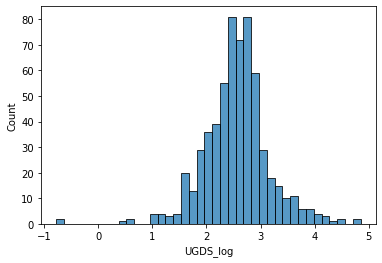

In [44]:
from math import log10
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Scorecard.txt', sep='\t')

df['UGDS'] = df.UGDS + 1/6
df['UGDS_log'] = df.UGDS.apply(log10)

sns.boxplot(x='TYPE', y='UGDS_log', data=df)
plt.show()

for t in df.TYPE.unique():
    data = df[df.TYPE == t]
    print(data.UGDS_log.describe())
    sns.histplot(data.UGDS_log)
    plt.show()

Public
Private
For Profit
